# prerequistes 

In [1]:
import pandas as pd 

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt 

In [4]:
from pandas.plotting import register_matplotlib_converters

In [5]:
%matplotlib inline 

In [6]:
from matplotlib.pylab import rcParams

In [7]:
rcParams['figure.figsize']=20,10

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler = MinMaxScaler(feature_range=(0,1))

In [10]:
#read the file

In [11]:
df = pd.read_csv('C://Users/derek/OneDrive/Documents/NSE-TATAGLOBAL11.csv')

In [12]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [12]:
df.count()

Date                    1235
Open                    1235
High                    1235
Low                     1235
Last                    1235
Close                   1235
Total Trade Quantity    1235
Turnover (Lacs)         1235
dtype: int64

In [23]:
#Setting index as data, plot

In [13]:
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')

In [14]:
df.index = df['Date']

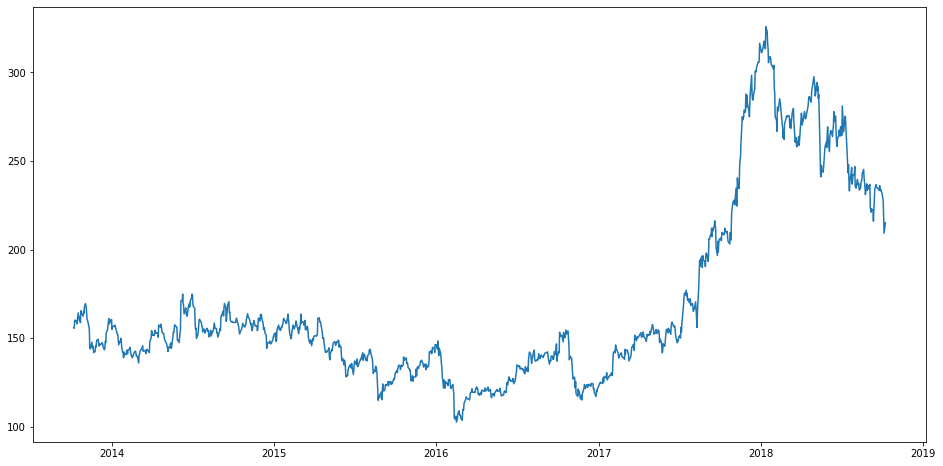

In [64]:
plt.figure(figsize=(16,8))
plt.plot(df['Close'],label='Close Price history')

# Moving Average

In [65]:
data = df.sort_index(ascending=True,axis=0)

In [66]:
new_data=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])

In [67]:
for i in range(0,len(data)):
    new_data['Date'][i]=data['Date'][i]
    new_data['Close'][i]=data['Close'][i]

In [68]:
train = new_data[:987]
valid = new_data[987:]

In [69]:
new_data.shape, train.shape, valid.shape

((1235, 2), (987, 2), (248, 2))

In [70]:
train['Date'].min(), train['Date'].max(),valid['Date'].min(),valid['Date'].max()

(Timestamp('2013-10-08 00:00:00'),
 Timestamp('2017-10-06 00:00:00'),
 Timestamp('2017-10-09 00:00:00'),
 Timestamp('2018-10-08 00:00:00'))

In [71]:
#make predictions 

In [72]:
preds=[]

In [73]:
for i in range(0,248):
    a = train['Close'][len(train)-248+i:].sum() +sum(preds)
    b = a/248
    preds.append(b)

In [74]:
rms = np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))

In [75]:
rms

104.51415465984348

c:\users\derek\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\derek\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


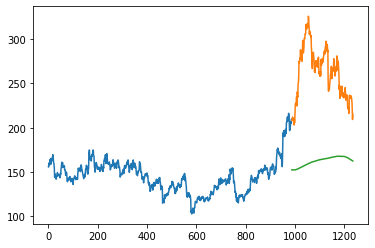

In [76]:
valid['Predictions']=0
valid['Predictions']=preds
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])

# Linear Rregression 

In [77]:
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

In [78]:
data = df.sort_index(ascending=True, axis=0)

# k-Nearest Neighbours

In [84]:
#importing libraries
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [85]:
#setting index as date values
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#sorting
data = df.sort_index(ascending=True, axis=0)

#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]


In [90]:
#split into train and validation
x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']

# Auto ARIMA

In [5]:
pip install pyramid

Note: you may need to restart the kernel to use updated packages.


# Long Short Term Memory (LSTM)

In [13]:
import tensorflow

In [15]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

Using TensorFlow backend.


In [17]:
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [18]:
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)


In [19]:
dataset = new_data.values


In [20]:
train = dataset[0:987,:]
valid = dataset[987:,:]

In [21]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [22]:
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [23]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

W0902 21:02:58.041831  7400 deprecation_wrapper.py:119] From C:\Users\derek\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0902 21:02:58.082757  7400 deprecation_wrapper.py:119] From C:\Users\derek\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0902 21:02:58.097687  7400 deprecation_wrapper.py:119] From C:\Users\derek\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0902 21:02:59.795772  7400 deprecation_wrapper.py:119] From C:\Users\derek\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0902 21:03:00.097580  7400 deprecation.py:323] From C:\Users\derek\Anaconda3\li

Epoch 1/1
 - 63s - loss: 0.0038


In [24]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))

C:\Users\derek\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


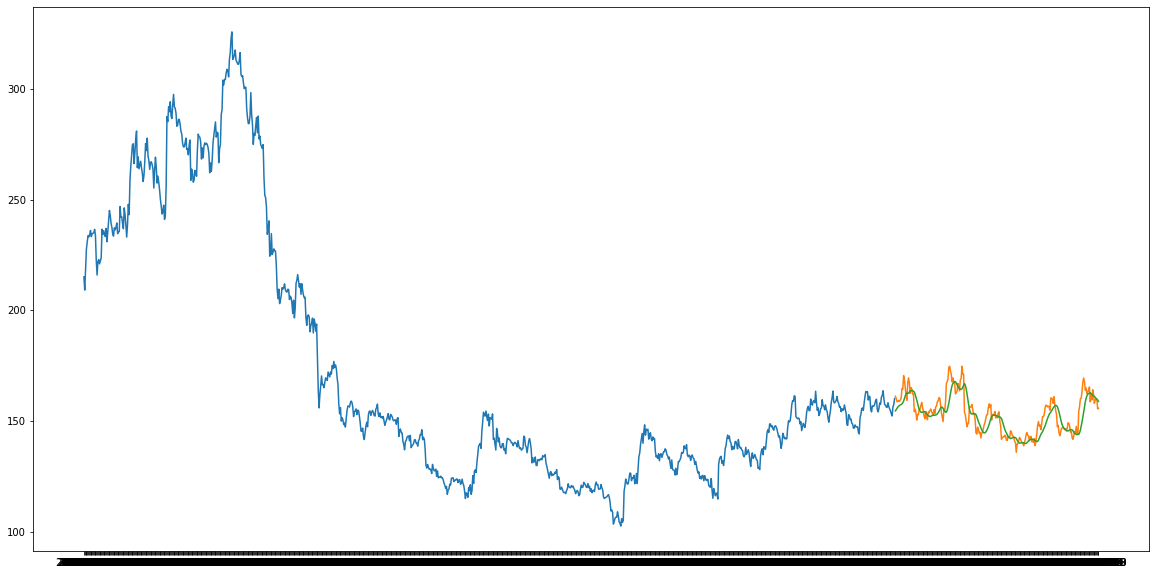

In [25]:
train = new_data[:987]
valid = new_data[987:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])